# HW01 数据分析入门

## 数据的读取和前处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./pbmc_data.csv')
data.head(10)

,Unnamed: 0,TNFRSF4,CPSF3L,ATAD3C,C1orf86,RER1,TNFRSF25,TNFRSF9,CTNNBIP1,SRM,...,BACE2,SIK1,C21orf33,ICOSLG,SUMO3,SLC19A1,S100B,PRMT2,cell_type,cell_type_string
0,AAACATACAACCAC-1,-0.171470,-0.280812,-0.046677,-0.475169,-0.544024,4.928497,-0.038028,-0.280573,-0.341788,...,-0.102943,-0.222116,-0.312401,-0.121678,-0.521229,-0.098269,-0.209095,-0.531203,0,CD4 T
1,AAACATTGAGCTAC-1,-0.214582,-0.372653,-0.054804,-0.683391,0.633951,-0.334837,-0.045589,-0.498264,-0.541914,...,0.007155,-0.445372,1.629285,-0.058662,-0.857163,-0.266844,-0.313146,-0.596654,2,B
2,AAACATTGATCAGC-1,-0.376888,-0.295085,-0.057527,-0.520972,1.332648,-0.309362,-0.103108,-0.272526,-0.500799,...,-0.071774,-0.297857,-0.410920,-0.070431,-0.590720,-0.158656,-0.170876,1.379000,0,CD4 T
3,AAACCGTGCTTCCG-1,-0.285241,-0.281735,-0.052227,-0.484929,1.572680,-0.271825,-0.074552,-0.258875,-0.416752,...,-0.093818,-0.247770,2.552079,-0.097402,1.631684,-0.119462,-0.179120,-0.505669,1,CD14 Monocytes
4,AAACCGTGTATGCG-1,-0.256484,-0.220394,-0.046800,-0.345859,-0.333409,-0.208122,-0.069514,5.806440,-0.283112,...,-0.167350,-0.098665,-0.275836,-0.139482,-0.310095,-0.006877,-0.109614,-0.461946,4,NK
5,AAACGCACTGGTAC-1,-0.271255,-0.264511,-0.050418,-0.445480,-0.492662,-0.252299,-0.071237,-0.219293,-0.375423,...,-0.114883,-0.204682,-0.333166,-0.110450,-0.470949,-0.086833,-0.161221,-0.494758,0,CD4 T
6,AAACGCTGACCAGT-1,-0.095658,-0.276485,-0.042734,-0.460367,-0.523118,-0.214493,-0.013944,-0.285865,2.661893,...,-0.113351,-0.196358,-0.277138,-0.140038,2.712008,-0.077633,-0.224386,-0.545170,0,CD4 T
7,AAACGCTGGTTCTT-1,-0.158133,-0.275627,-0.045692,-0.462676,-0.524482,3.693804,-0.034095,-0.270580,-0.323472,...,-0.109930,-0.207260,-0.301039,-0.127510,-0.501315,-0.086876,-0.206205,1.686912,3,CD8 T
8,AAACGCTGTAGCCA-1,4.861766,-0.230549,-0.048269,2.811605,-0.371003,-0.221948,-0.074153,-0.135050,-0.312851,...,-0.154340,-0.125792,-0.294290,-0.130048,-0.348268,-0.027551,-0.117883,-0.466450,3,CD8 T
9,AAACGCTGTTTCTG-1,-0.124531,-0.233736,-0.041312,-0.366757,-0.371873,-0.183660,-0.026164,-0.174223,-0.223219,...,-0.161135,-0.102548,-0.238799,-0.159160,-0.346874,-0.007587,-0.162559,-0.503395,5,FCGR3A Monocytes


## 降维与可视化

In [3]:
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap

/home/llt/.conda/envs/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
pca = PCA(n_components=50)
UMAP = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)

df = data.iloc[:,1:-2]

standardized_df = StandardScaler().fit_transform(df)
pca_result = pca.fit_transform(standardized_df)
umap_result = UMAP.fit_transform(pca_result)


In [27]:
cmap = plt.cm.colors.ListedColormap(plt.cm.tab20.colors)

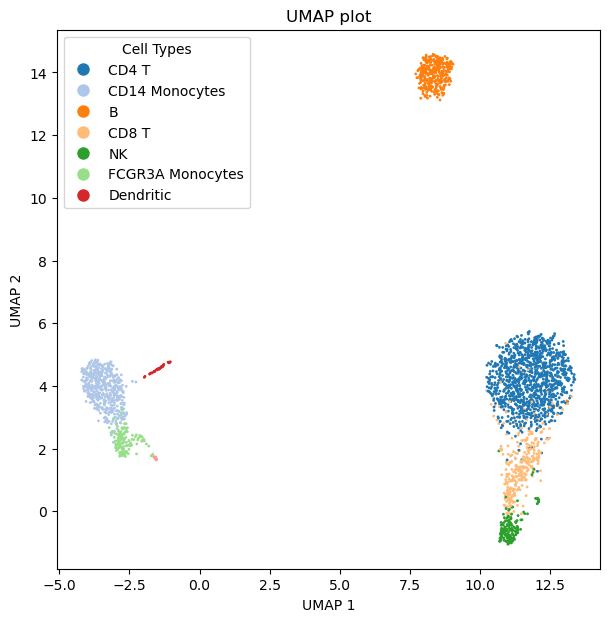

In [28]:
plt.figure(figsize=(7,7))
plt.title("UMAP plot")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.scatter(umap_result[:,0], umap_result[:,1],c=cmap(data['cell_type']),s=1)
dic = {}
#for i in len(data['cell_type'].iloc[:]):
#    dic[data['cell_type'][i]] = data['cell_type_str'][i]   
cell_type_mapping = dict(zip(data['cell_type'], data['cell_type_string']))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=cell_type_mapping[i],
                              markerfacecolor=cmap(i), markersize=10) 
                   for i in range(7)]
plt.legend(handles=legend_elements, title='Cell Types', loc='best')


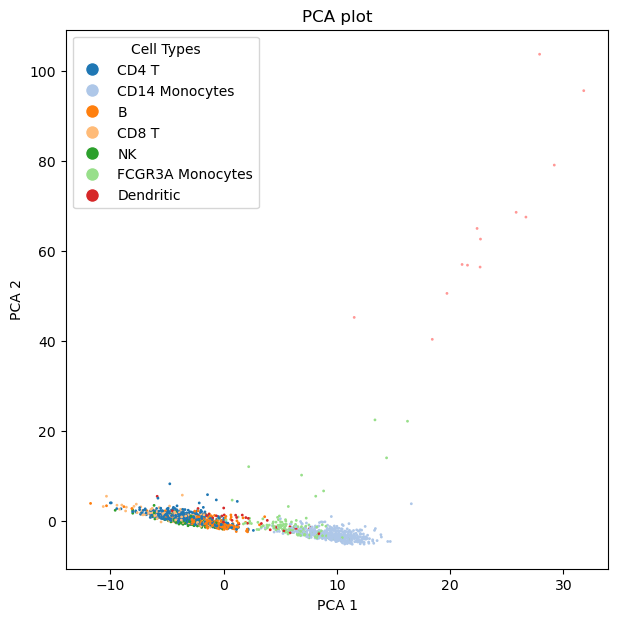

In [29]:
pca2 = PCA(n_components=2)
pca_result2 = pca2.fit_transform(standardized_df)

plt.figure(figsize=(7,7))
plt.title("PCA plot")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.scatter(pca_result2[:,0], pca_result2[:,1],c=cmap(data['cell_type']),s=1)
dic = {}
#for i in len(data['cell_type'].iloc[:]):
#    dic[data['cell_type'][i]] = data['cell_type_str'][i]   
cell_type_mapping = dict(zip(data['cell_type'], data['cell_type_string']))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=cell_type_mapping[i],
                              markerfacecolor=cmap(i), markersize=10) 
                   for i in range(7)]
plt.legend(handles=legend_elements, title='Cell Types', loc='best')


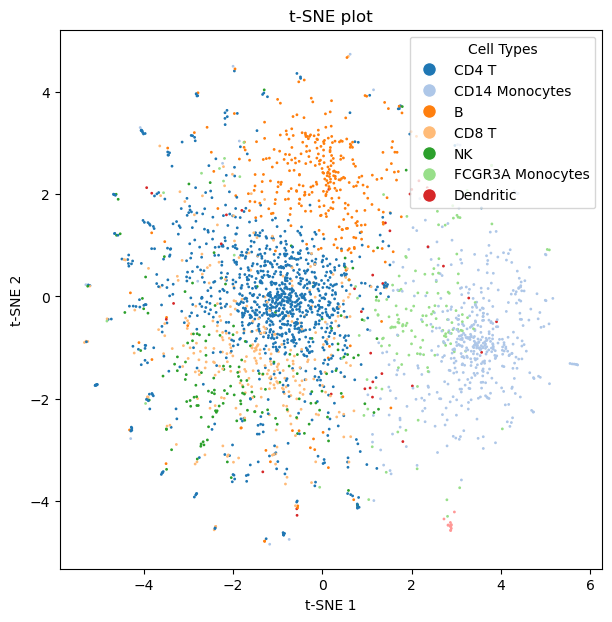

In [31]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(standardized_df)

plt.figure(figsize=(7,7))
plt.title("t-SNE plot")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.scatter(tsne_result[:,0], tsne_result[:,1],c=cmap(data['cell_type']),s=1)
dic = {}
#for i in len(data['cell_type'].iloc[:]):
#    dic[data['cell_type'][i]] = data['cell_type_str'][i]   
cell_type_mapping = dict(zip(data['cell_type'], data['cell_type_string']))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=cell_type_mapping[i],
                              markerfacecolor=cmap(i), markersize=10) 
                   for i in range(7)]
plt.legend(handles=legend_elements, title='Cell Types', loc='best')


## 分类器

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df, data['cell_type'], test_size=0.2, random_state=42)

In [57]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9242424242424242
confusion_matrix:
[[226   0   1   2   0   0   0   0]
 [  0 100   0   0   0   4   0   0]
 [  0   0  69   0   0   1   0   0]
 [ 16   0   0  35   4   0   0   0]
 [  0   0   0   2  32   0   0   0]
 [  0   7   0   0   0  21   0   0]
 [  1   2   0   0   0   0   3   0]
 [  0   0   0   0   0   0   0   2]]
0.873214943787822


In [38]:
svc = SVC(kernel='linear', C=1, random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9488636363636364
confusion_matrix:
[[225   0   0   4   0   0   0   0]
 [  0 101   0   0   0   3   0   0]
 [  0   0  70   0   0   0   0   0]
 [ 12   0   0  41   2   0   0   0]
 [  0   0   0   0  34   0   0   0]
 [  1   3   0   0   0  24   0   0]
 [  1   1   0   0   0   0   4   0]
 [  0   0   0   0   0   0   0   2]]
0.9240251853409749


In [39]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9450757575757576
confusion_matrix:
[[225   0   0   4   0   0   0   0]
 [  0 102   0   0   0   2   0   0]
 [  0   0  70   0   0   0   0   0]
 [ 13   0   0  40   2   0   0   0]
 [  0   0   0   1  33   0   0   0]
 [  1   4   0   0   0  23   0   0]
 [  0   1   1   0   0   0   4   0]
 [  0   0   0   0   0   0   0   2]]
0.9182146468673732


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.48484848484848486
confusion_matrix:
[[229   0   0   0   0   0   0   0]
 [ 78  26   0   0   0   0   0   0]
 [ 70   0   0   0   0   0   0   0]
 [ 55   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0   0]
 [ 28   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1]]
0.2117579908675799


In [55]:
std = StandardScaler()
pca = PCA(n_components=50)
UMAP = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)

df = data.iloc[:,1:-2]
std.fit(X_train)
standardized_df = std.transform(X_train)
pca.fit(standardized_df)
pca_result = pca.transform(standardized_df)
UMAP.fit(pca_result)
X_train_umap = UMAP.transform(pca_result)

standardized_df = std.transform(X_test)
pca_result = pca.transform(standardized_df)
X_test_umap = UMAP.transform(pca_result)


knn_umap = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
knn_umap.fit(X_train_umap,y_train)
y_pred = knn_umap.predict(X_test_umap)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9431818181818182
confusion_matrix:
[[227   0   0   2   0   0   0   0]
 [  0 102   0   0   0   2   0   0]
 [  1   0  69   0   0   0   0   0]
 [ 16   0   0  38   1   0   0   0]
 [  0   0   0   3  31   0   0   0]
 [  0   3   0   0   0  25   0   0]
 [  0   0   2   0   0   0   4   0]
 [  0   0   0   0   0   0   0   2]]
0.9173282348316668


### 评估依据
我们选择accuracy score，confusion matrix，f1 score。准确率是最直观简单的选择，可以很清楚的显现出其分类的整体准确性。confusion matrix最为准确全面，可以完整全面显示分类的情况和错误出现的类别。

对于这个数据来说，细胞类型显然很不平衡，使用准确率不能准确反应其分类效果。使用marco f1 score来进行计算反应真实效果，这样可以更好反应真实准确率。

### 模型效果
根据以上结果，我们容易发现分类效果最好的为svm,其f1分数为最高的。分类效果最差的是直接对基因表达矩阵做KNN，大部分元素都被错误的分类成了第一类。然而值得注意的是，将基因表达矩阵做umap后效果大幅提升（未调优参数，其性能可能更高），这应该是因为基因表达矩阵携带信息过于稀疏，很容易出现过拟合的问题，做umap后压缩了信息，让表达接近的细胞真实地embed到了接近的位置，从而大幅增强了模型的表现。

同时，我们可以发现最容易混淆的是将第三种细胞分类成第一种细胞，即将B细胞分类成CD4 T细胞。这个也是可以理解的，这两种细胞确实有一定的相似性，所以出现了分类错误的情况。

必须指出的是，以上的各种模型都有很多超参数可以调整，由于时间、精力原因，没有对参数进行调优。所以，本实验可能并不能完全清晰显示各个模型最优效果的差异。